In [1]:
# Import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# creat a se of random latitude and longitudes combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [4]:
#import citpy 
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [6]:
import requests
requests.__version__

'2.25.1'

Map out project using Pseudocode

In [7]:
#import dependencies and intitalize coutner and an empty list to hold weather data 
#Loop through the Cities list 
#group the cities in sets of 50 to lof the process as we find the weather data for each city 
    #Two counter will be needed: one to log the cit count from 1-50 and second for the set
#Build the city_url for each city 
#log the url and the record and st numbers
#make the api request for each city
#parse the JSON weather date for the following 
    #City,country and date
    #lat/long
    #max temp
    #humidity
    #cloudiness
    #wind speed
#Add the data to a list in a dictionary format and convert to df

In [8]:
# ipor dependencies and URL
import requests
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | port-gentil
Processing Record 3 of Set 1 | mareeba
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | camp verde
Processing Record 6 of Set 1 | hasaki
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | camabatela
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | amderma
City not found. Skipping...
Processing Record 15 of Set 1 | severo-kurilsk
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | poum
Processing Record 18 of Set 1 | washington
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | lasa
Processing Record 21 of Set 1 | rantepao
Processing R

Processing Record 40 of Set 4 | faanui
Processing Record 41 of Set 4 | arraial do cabo
Processing Record 42 of Set 4 | kuanshan
City not found. Skipping...
Processing Record 43 of Set 4 | itarema
Processing Record 44 of Set 4 | pakokku
Processing Record 45 of Set 4 | berlevag
Processing Record 46 of Set 4 | galgani
City not found. Skipping...
Processing Record 47 of Set 4 | hambantota
Processing Record 48 of Set 4 | port augusta
Processing Record 49 of Set 4 | bubaque
Processing Record 50 of Set 4 | karpathos
Processing Record 1 of Set 5 | kadirli
Processing Record 2 of Set 5 | greystones
Processing Record 3 of Set 5 | villa alemana
Processing Record 4 of Set 5 | katsuura
Processing Record 5 of Set 5 | rizoma
Processing Record 6 of Set 5 | tautira
Processing Record 7 of Set 5 | souillac
Processing Record 8 of Set 5 | qaanaaq
Processing Record 9 of Set 5 | aasiaat
Processing Record 10 of Set 5 | shimoda
Processing Record 11 of Set 5 | palabuhanratu
City not found. Skipping...
Processing

Processing Record 26 of Set 8 | kill
Processing Record 27 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 28 of Set 8 | kathu
Processing Record 29 of Set 8 | plouzane
Processing Record 30 of Set 8 | oussouye
Processing Record 31 of Set 8 | bluefields
Processing Record 32 of Set 8 | nokaneng
Processing Record 33 of Set 8 | cabo san lucas
Processing Record 34 of Set 8 | safaga
Processing Record 35 of Set 8 | riohacha
Processing Record 36 of Set 8 | faya
Processing Record 37 of Set 8 | khuzdar
Processing Record 38 of Set 8 | aripuana
Processing Record 39 of Set 8 | arlit
Processing Record 40 of Set 8 | miri
Processing Record 41 of Set 8 | bambanglipuro
Processing Record 42 of Set 8 | srednekolymsk
Processing Record 43 of Set 8 | boa vista
Processing Record 44 of Set 8 | tsentralnyy
City not found. Skipping...
Processing Record 45 of Set 8 | santa rosalia
Processing Record 46 of Set 8 | murgab
Processing Record 47 of Set 8 | zhanaozen
Processing Record 48 of

Processing Record 11 of Set 12 | warrington
Processing Record 12 of Set 12 | klaksvik
Processing Record 13 of Set 12 | jiroft
City not found. Skipping...
Processing Record 14 of Set 12 | kyra
Processing Record 15 of Set 12 | pithora
Processing Record 16 of Set 12 | aranda de duero
Processing Record 17 of Set 12 | baykit
Processing Record 18 of Set 12 | wagar
Processing Record 19 of Set 12 | hamilton
Processing Record 20 of Set 12 | temyasovo
Processing Record 21 of Set 12 | tommot
Processing Record 22 of Set 12 | acapulco
Processing Record 23 of Set 12 | yirol
City not found. Skipping...
Processing Record 24 of Set 12 | talakan
Processing Record 25 of Set 12 | jalu
Processing Record 26 of Set 12 | kharhial
Processing Record 27 of Set 12 | mount isa
Processing Record 28 of Set 12 | tokat
Processing Record 29 of Set 12 | mweka
Processing Record 30 of Set 12 | ventspils
Processing Record 31 of Set 12 | kjopsvik
Processing Record 32 of Set 12 | orange walk
Processing Record 33 of Set 12 | 

In [14]:
len(city_data)

582

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,-25.60,75,75,2.30,CA,2021-03-27 17:36:10
1,Port-Gentil,-0.7193,8.7815,82.40,78,20,5.75,GA,2021-03-27 17:32:35
2,Mareeba,-17.0000,145.4333,77.00,83,75,12.66,AU,2021-03-27 17:36:11
3,Hermanus,-34.4187,19.2345,63.00,73,58,12.24,ZA,2021-03-27 17:36:11
4,Camp Verde,34.5636,-111.8543,57.99,44,0,8.01,US,2021-03-27 17:36:11
5,Hasaki,35.7333,140.8333,57.20,72,75,10.36,JP,2021-03-27 17:36:11
6,Kapaa,22.0752,-159.3190,73.40,83,20,13.80,US,2021-03-27 17:36:12
7,Port Alfred,-33.5906,26.8910,67.24,72,19,19.39,ZA,2021-03-27 17:36:12
8,Port Elizabeth,-33.9180,25.5701,62.60,82,0,13.80,ZA,2021-03-27 17:36:12
9,Mataura,-46.1927,168.8643,55.00,92,60,1.97,NZ,2021-03-27 17:36:12


In [16]:
# re-orderthe data fram columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2021-03-27 17:36:10,69.4541,-133.0374,-25.60,75,75,2.30
1,Port-Gentil,GA,2021-03-27 17:32:35,-0.7193,8.7815,82.40,78,20,5.75
2,Mareeba,AU,2021-03-27 17:36:11,-17.0000,145.4333,77.00,83,75,12.66
3,Hermanus,ZA,2021-03-27 17:36:11,-34.4187,19.2345,63.00,73,58,12.24
4,Camp Verde,US,2021-03-27 17:36:11,34.5636,-111.8543,57.99,44,0,8.01
5,Hasaki,JP,2021-03-27 17:36:11,35.7333,140.8333,57.20,72,75,10.36
6,Kapaa,US,2021-03-27 17:36:12,22.0752,-159.3190,73.40,83,20,13.80
7,Port Alfred,ZA,2021-03-27 17:36:12,-33.5906,26.8910,67.24,72,19,19.39
8,Port Elizabeth,ZA,2021-03-27 17:36:12,-33.9180,25.5701,62.60,82,0,13.80
9,Mataura,NZ,2021-03-27 17:36:12,-46.1927,168.8643,55.00,92,60,1.97


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

PLot Latitude vs Temperature

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

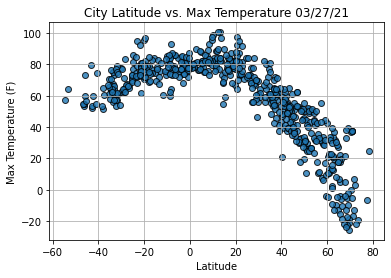

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

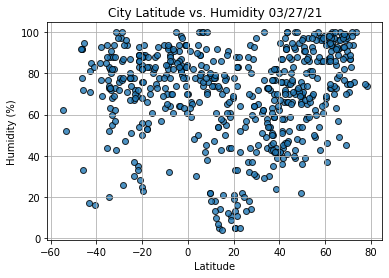

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

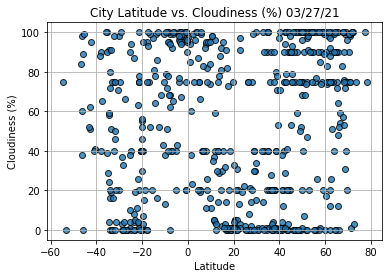

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

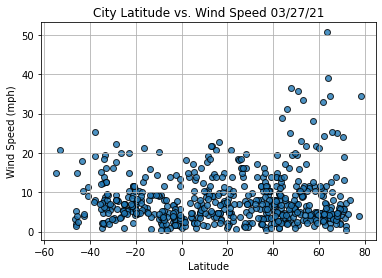

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

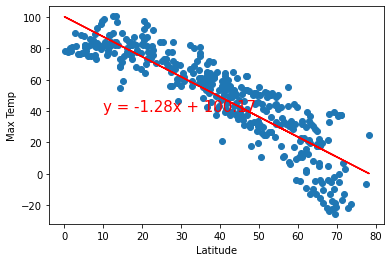

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \for Maximum Temperature', 'Max Temp',(10,40))


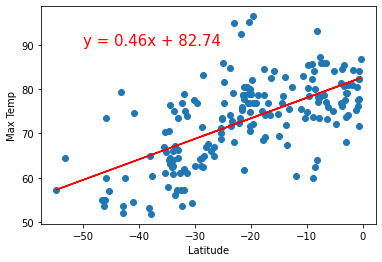

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

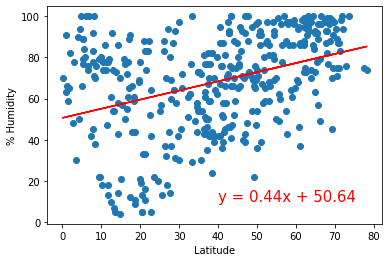

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

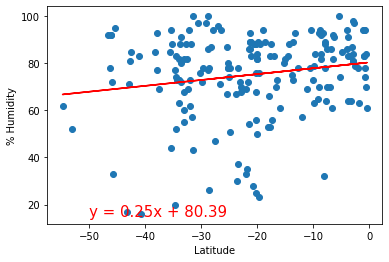

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

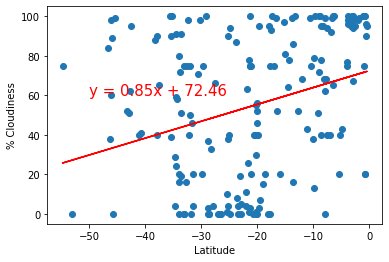

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

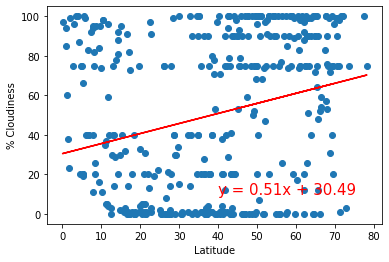

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

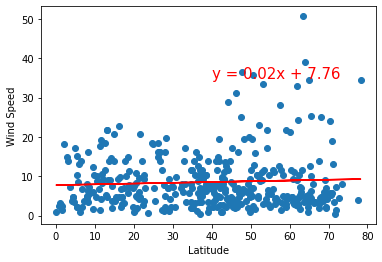

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

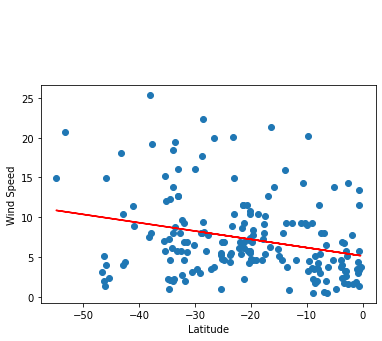

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))